In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
# df_target = gpd.read_file("../data/Sentinel-2/farm/YL20181Rice.shp")
df_pred = gpd.read_file("./shp_result/pred_T50QRM_20180322T022651_B2348.shp")
df_edge = gpd.read_file("../data/Sentinel-2/雲林縣/COUNTY_MOI_1080726.shp")
df_pred.head()

,FID,geometry
0,0,"POLYGON ((144512.0468149389 2698008.5835, 1445..."
1,1,"POLYGON ((144482.0834510898 2697968.632348202,..."
2,2,"POLYGON ((151333.7059845649 2697798.839953057,..."
3,3,"POLYGON ((151373.6571363636 2697798.839953057,..."
4,4,"POLYGON ((146020.2027953393 2697788.852165108,..."


In [2]:
df_edge_proj = df_edge.copy()
df_edge_proj['geometry'] = df_edge_proj['geometry'].to_crs(epsg=3826)
df_edge_proj

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,P,10009,雲林縣,Yunlin County,(POLYGON ((156163.9999978779 2602623.000158406...


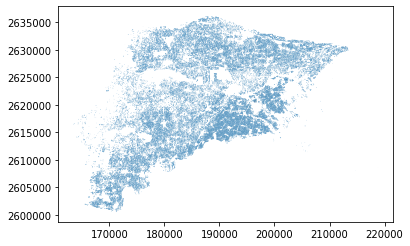

In [101]:
# df_target["geometry"].plot()

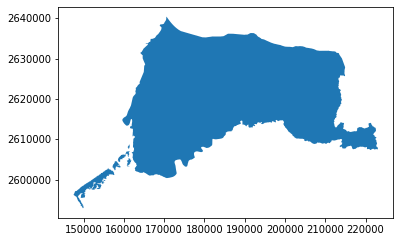

In [99]:
data_proj["geometry"].plot()

In [43]:
import geopandas as gpd
from shapely.geometry import Polygon

tmp = []
for idx, g in df_pred.iterrows():
    if(df_edge_proj.intersects(g.geometry).values[0]==True):
        tmp.append(idx)

# 需保留的統計資訊

farms: 幾塊農田

average_area: 平均面積(公頃)

total_area: 總面積(公頃)

yield_per_hec: 單位面積產量(公噸/公頃),2017: 5.852675, 2018: 6.867416

yield: 雲林縣總產量


In [44]:
predict_area_idx = tmp
total_area = np.sum(df_pred.loc[predict_area_idx].geometry.area)/1e4 # 公尺平方 -> 公頃
predict_dict= {}

predict_dict["pred_T50QRM_20180322T022651_B2348"] = {
    'farms': len(predict_area_idx),
    'avg_area': total_area / len(predict_area_idx),
    'total_area': total_area,
    'yield_per_hec' : 6.867416,
    'yield': total_area * 6.867416
}
predict_dict

{'pred_T50QRM_20180312T022551_B2348': {'farms': 32008,
  'avg_area': 38.47481998834792,
  'total_area': 1231502.0381870402,
  'yield_per_hec': 6.867416,
  'yield': 8457236.801078292},
 'pred_T50QRM_20180215T022759_B2348': {'farms': 44078,
  'avg_area': 28.677133583552717,
  'total_area': 1264030.6940958367,
  'yield_per_hec': 6.867416,
  'yield': 8680624.613124855},
 'pred_T50QRM_20180322T022651_B2348': {'farms': 36518,
  'avg_area': 33.80268911547384,
  'total_area': 1234406.6011188736,
  'yield_per_hec': 6.867416,
  'yield': 8477183.643029371}}

In [45]:
predict_dict["pred_T50QRM_20180322T022651_B2348"]
# len(predict_area_idx)

{'farms': 36518,
 'avg_area': 33.80268911547384,
 'total_area': 1234406.6011188736,
 'yield_per_hec': 6.867416,
 'yield': 8477183.643029371}